<a href="https://colab.research.google.com/github/Alejandro405/tfg/blob/main/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import pandas as pd

import os as os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

df_columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class'])

In [ ]:
!pip install ydata_profiling --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.7 MB/s eta 0:00:00


In [ ]:
raw_df = pd.read_csv('./drive/MyDrive/nsl-kdd/a_KDDTrain+.csv')

raw_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


In [ ]:
train = pd.read_csv('./drive/MyDrive/nsl-kdd/KDDTrain+.csv')
test = pd.read_csv('./drive/MyDrive/nsl-kdd/KDDTest+.csv')

In [ ]:
#df = pd.concat([train, test], axis=0, ignore_index=True)

df.rename(columns={'Class':'Label'})

df.to_csv('./drive/MyDrive/nsl-kdd/nsl-kdd.csv', index=False, header=True)

In [ ]:
df = raw_df.copy()

cfg = Settings()
cfg.infer_dtypes = False
cfg.correlations["auto"].calculate = True
cfg.correlations["pearson"].calculate = True
cfg.correlations["spearman"].calculate = True  # No calcular correlaciones de Spearman
cfg.correlations["kendall"].calculate = True  # No calcular correlaciones de Kendall
cfg.correlations["phi_k"].calculate = True  # No calcular coeficiente de correlación phi_k
cfg.correlations["cramers"].calculate = True  # No calcular coeficiente de correlación Cramers
cfg.interactions.continuous = False
cfg.missing_diagrams["bar"] = True
cfg.missing_diagrams["heatmap"] = True  # Mantener heatmap para visualizar valores perdidos
cfg.missing_diagrams["matrix"] = True
cfg.samples.tail = 0
cfg.samples.random = 0

profile = ProfileReport(
    df,
    title='NSL KDD - EDA',
    config=cfg
)



In [ ]:
profile.to_file('EDA_KDD.html')

## Estudio EDA
Columnas con mas de un 75% de zeros

In [ ]:
df = raw_df.copy()

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [ ]:
# Ver las variables con alertas por ceros
zero_vars = []
skewed_vars = []

# Iterar sobre las variables en el reporte
for variable in profile.description_set.variables:
    prop = profile.description_set.variables.get(variable)
    # Verificar si la variable tiene la clave 'p_zeros'
    if 'p_zeros' in prop and prop['p_zeros'] > 0.90:
        zero_vars.append(variable)
    if 'skewness' in prop and prop['skewness'] >= 27.24730213:
        skewed_vars.append(variable)

In [ ]:
df = raw_df.copy()
#df.drop(columns=['Unnamed: 0'], inplace=True)
#df.columns = kdd_columns
df.head()

for col in df.columns:
    df = df[~df[col].isin([col])]

df.reset_index(drop=True, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

sampled_df = df.groupby('Class').apply(lambda x: x.sample(frac=.25))
sampled_df = sampled_df.select_dtypes(include=[np.number])

matriz_correlacion = sampled_df.corr()

In [ ]:
sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=.25))
sampled_df = sampled_df.select_dtypes(include=[np.number])

matriz_correlacion = sampled_df.corr()

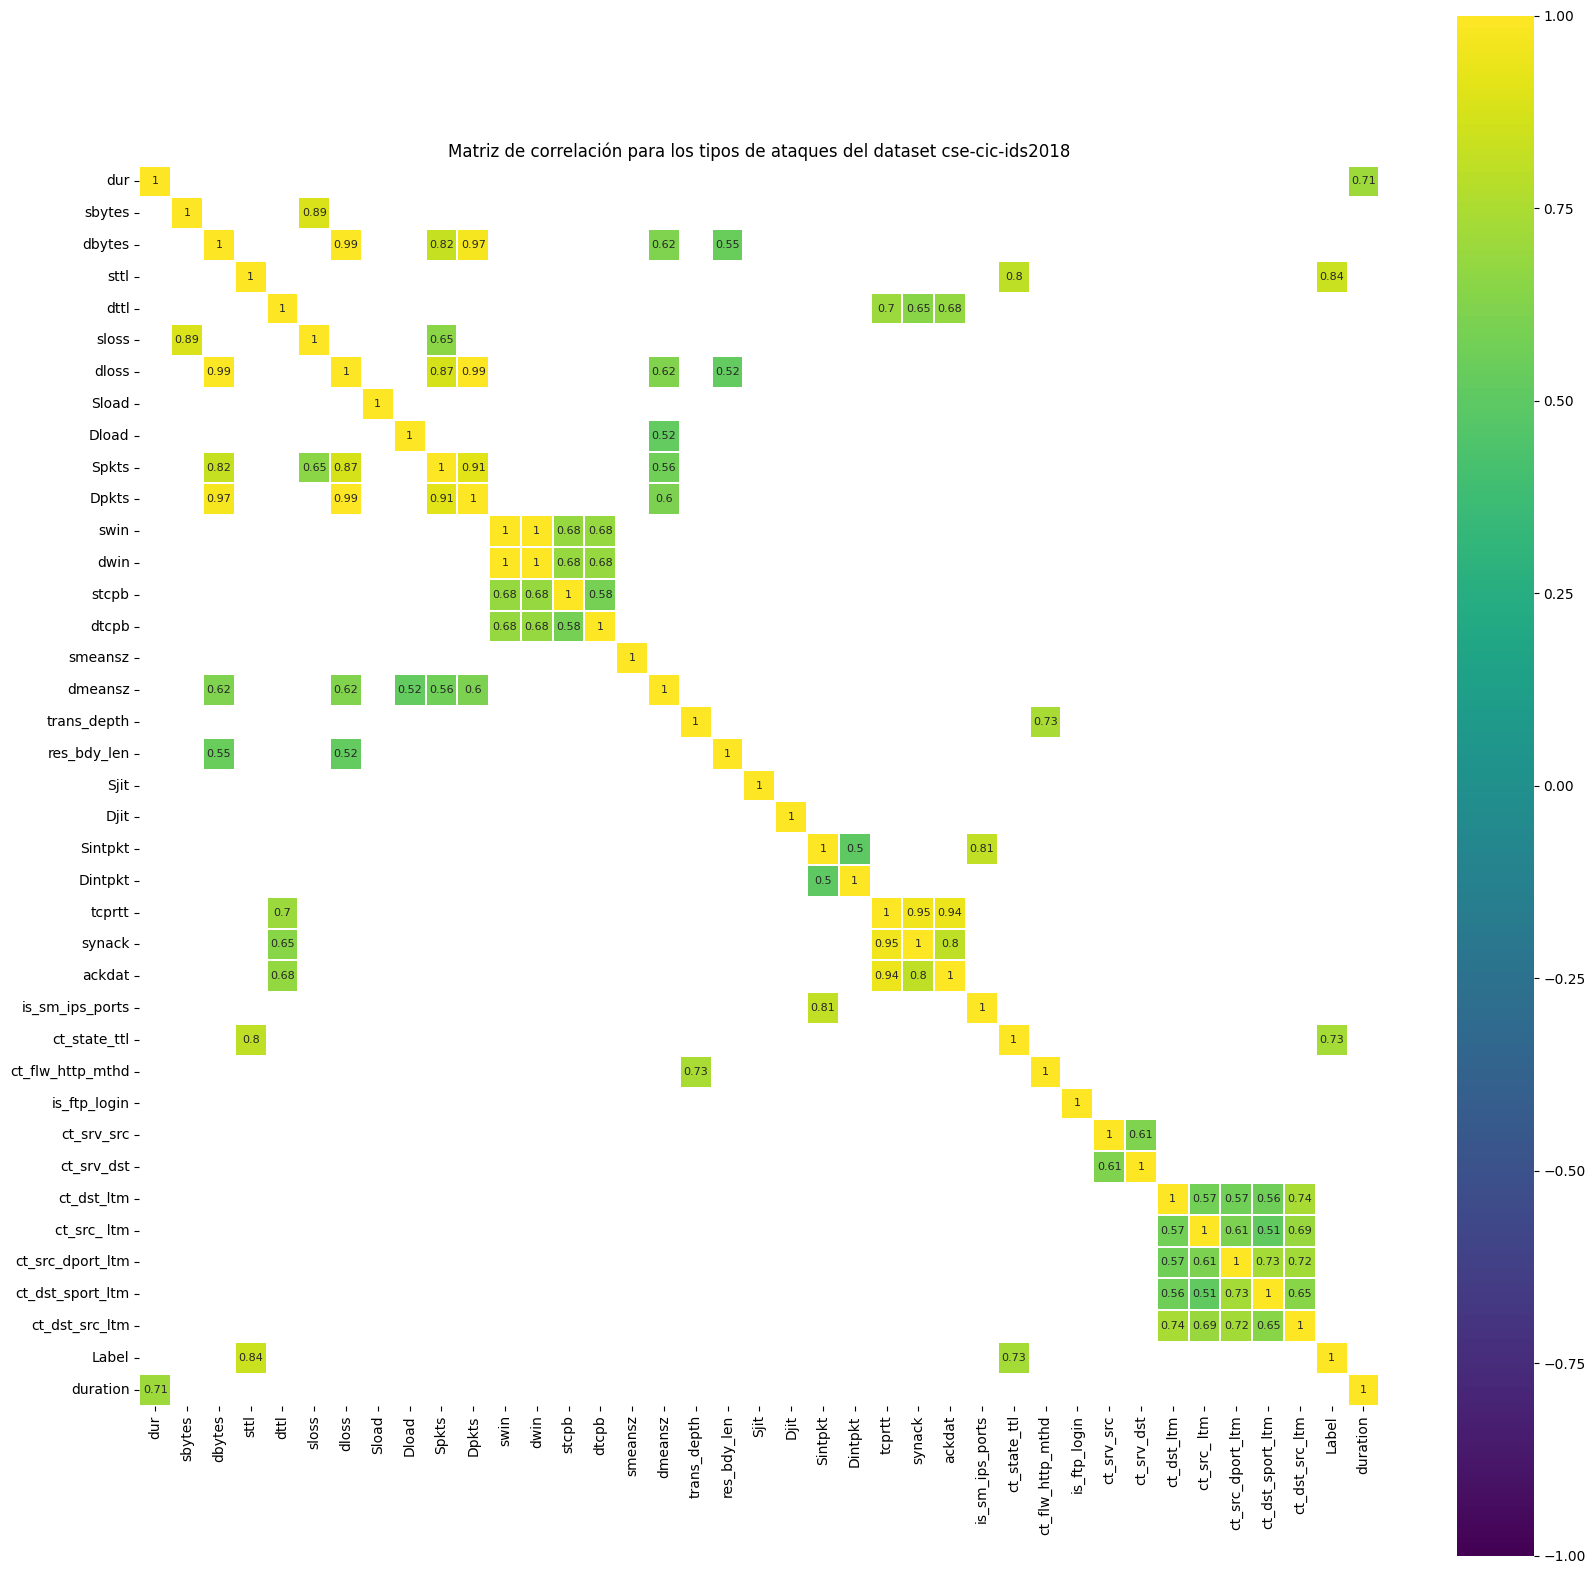

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.5) | (matriz_correlacion <= -0.4)], cmap='viridis',vmax=1.0, vmin=-1.0, linewidths=0.3, annot=True, annot_kws={"size": 8}, square=True)

plt.title('Matriz de correlación para los tipos de ataques del dataset cse-cic-ids2018')

plt.show()

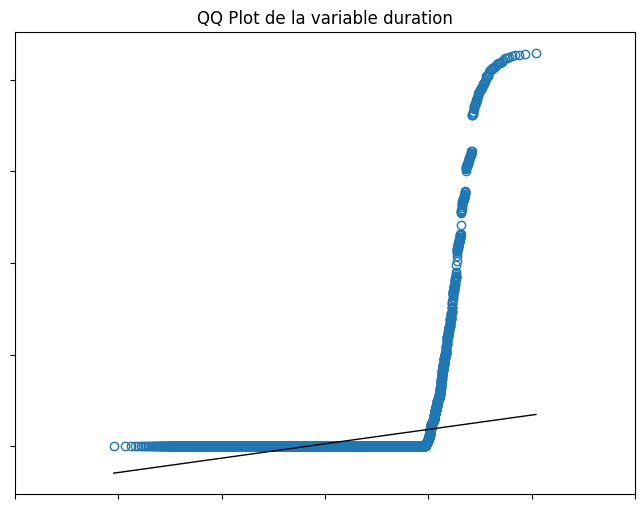

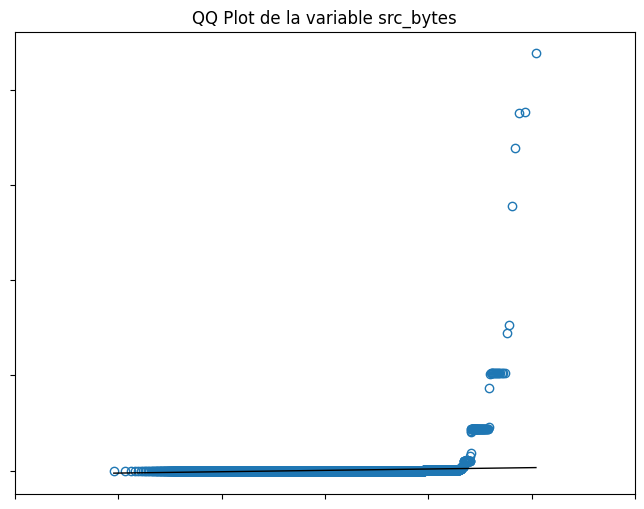

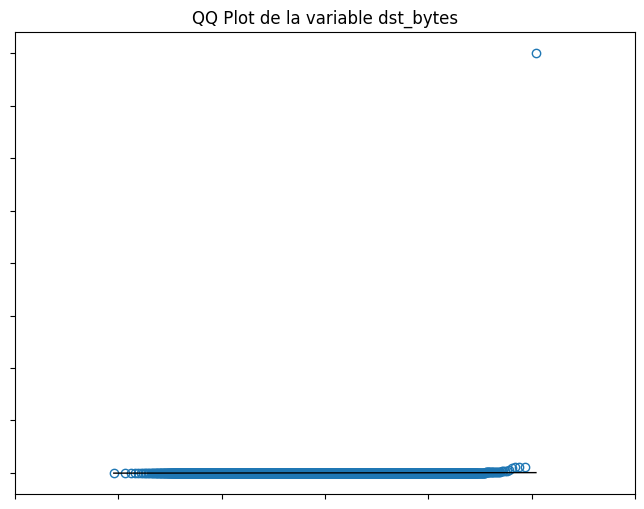

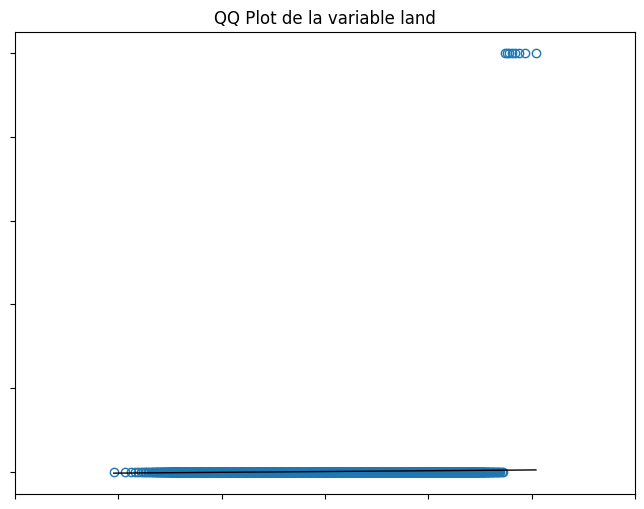

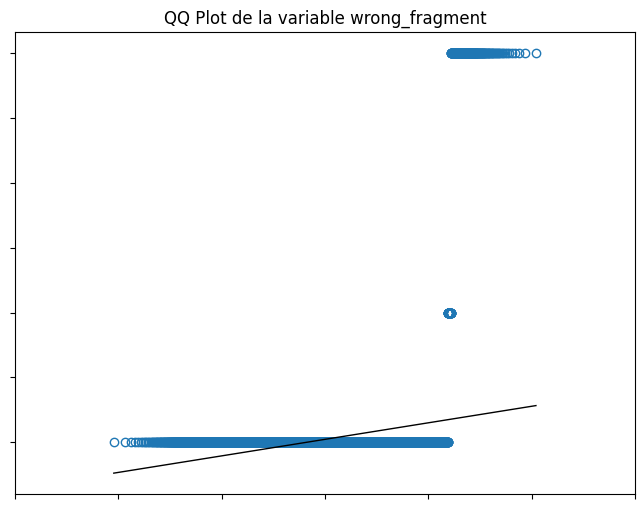

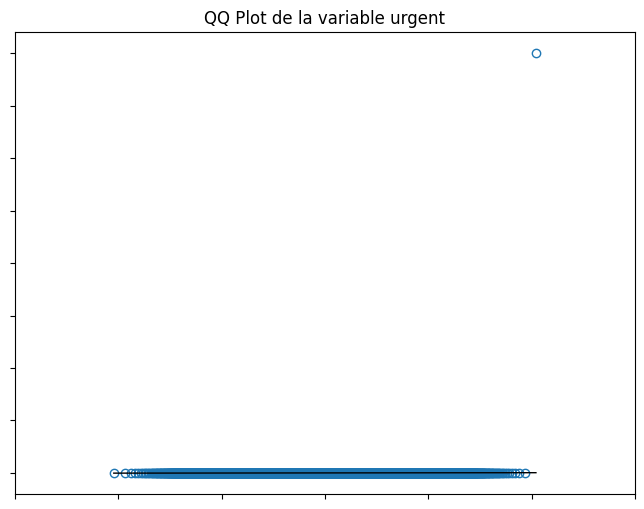

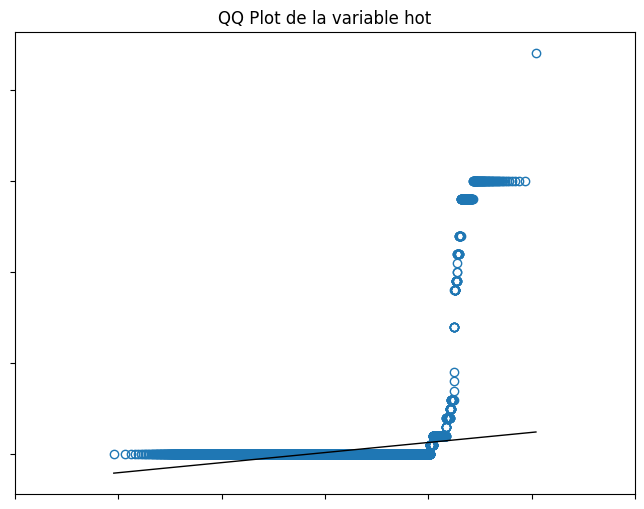

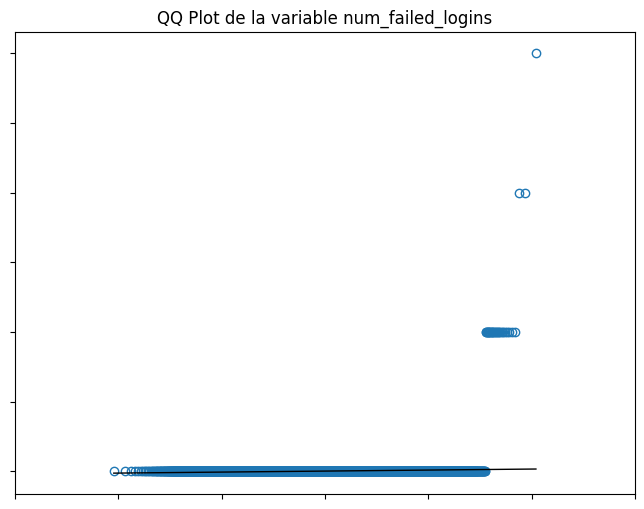

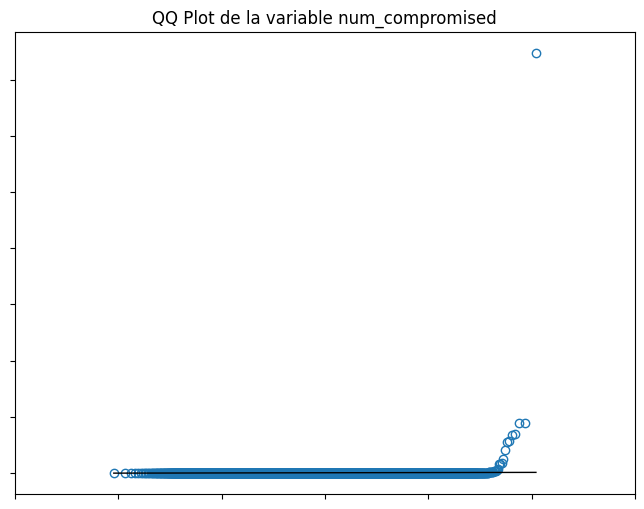

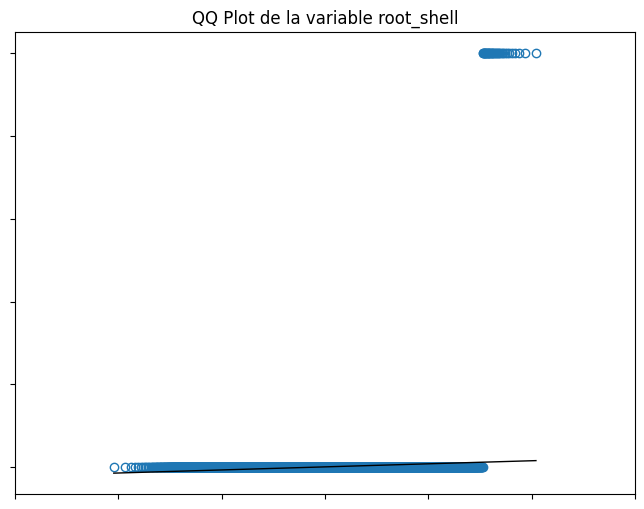

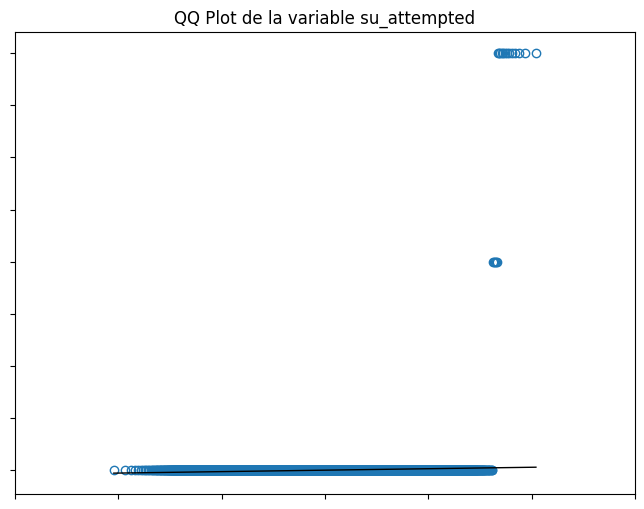

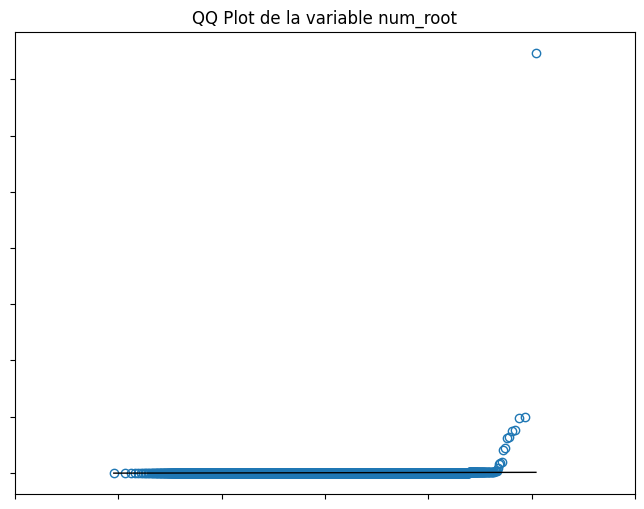

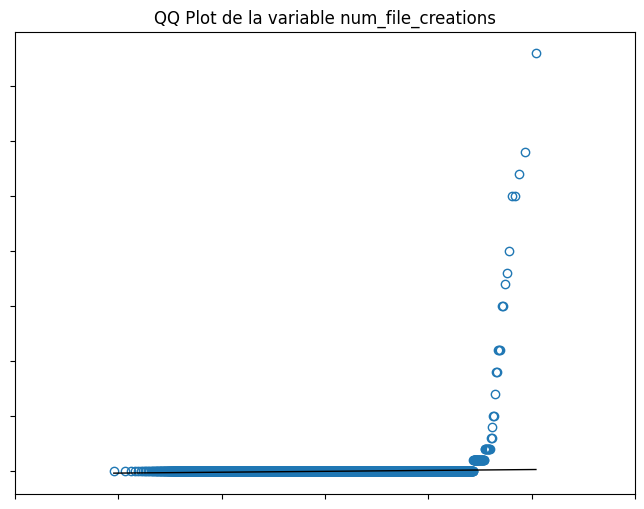

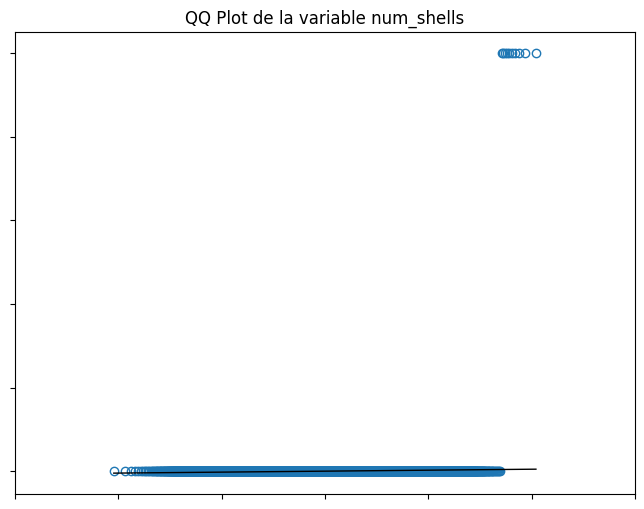

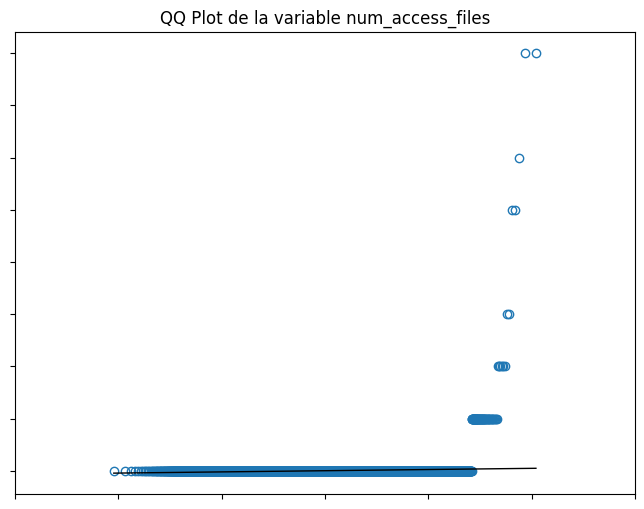

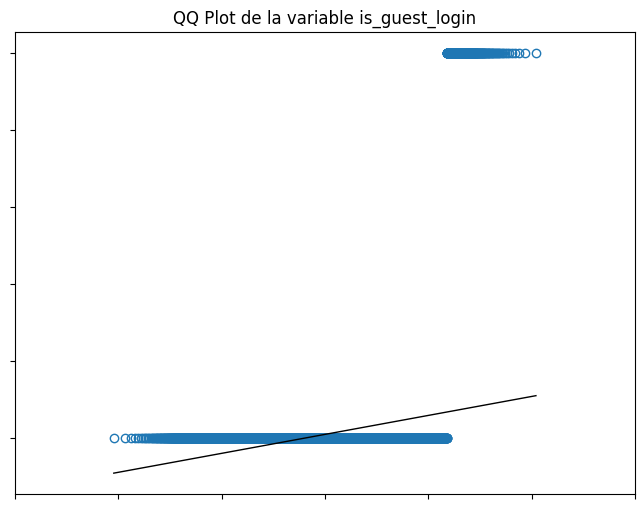

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

for var in sesgadas:
    plt.figure(figsize=(8, 6))
    (osm, osr), (slope, intercept, r) = stats.probplot(sampled_df[var], dist="norm")
    plt.plot(osm, osr, 'o', markerfacecolor='none', markeredgecolor='#1f77b4')
    plt.plot(osm, slope*osm + intercept, color='black', lw=1)
    plt.title('QQ Plot de la variable ' + var)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
    plt.grid(False)

    plt.xlim([-6, 6])  # Set x-axis limits
    # Save the figure before calling plt.show()
    plt.savefig(f'{var.replace("/", "_")}_qqplot.png', dpi=300, bbox_inches='tight')

    plt.show()

In [ ]:
!zip  qqplots_nslkdd.zip *.png

In [ ]:
print(f'Número de zero var: {len(zero_vars)}')
print(f'Número de variables sesgadas: {len(skewed_vars)}')
print(f'Número de variables totales: {len(df.columns)}')

In [ ]:
import json

aux = {
    "sesgadas" : skewed_vars,
    "zero_vars" : zero_vars
}

dst_file = './drive/MyDrive/nsl-kdd/var_report.json'
with open(dst_file, 'w') as file:
  json.dump(aux, file)

In [ ]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

matriz_correlacion = df.corr()

correlacion_objetivo = matriz_correlacion["class"].abs() > 0.65
variables_interesantes_objetivo = matriz_correlacion.columns[correlacion_objetivo].tolist()

# Seleccionar las variables con una correlación alta entre sí
correlacion_entre_variables = (matriz_correlacion.abs() > 0.65) & (matriz_correlacion.abs() < 1.0)
variables_interesantes_entre_variables = []
for columna in correlacion_entre_variables:
    variables_correlacionadas = matriz_correlacion.index[correlacion_entre_variables[columna]].tolist()
    variables_interesantes_entre_variables.extend(variables_correlacionadas)

# Combinar las variables seleccionadas
variables_interesantes = variables_interesantes_objetivo
candidatos_eliminar = list(set(variables_interesantes_entre_variables))

# Eliminar la variable objetivo si está presente en las variables seleccionadas
if "class" in variables_interesantes:
    variables_interesantes.remove("class")

if "class" in variables_interesantes:
    candidatos_eliminar.remove("class")

<ipython-input-23-43af006ab570>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


## Eliminacion de Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

sampled_df = df.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.5))

enc = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

categ = [idx for idx, dtype in df.dtypes.items() if dtype == 'object']
numer = [idx for idx, dtype in df.dtypes.items() if dtype != 'object']

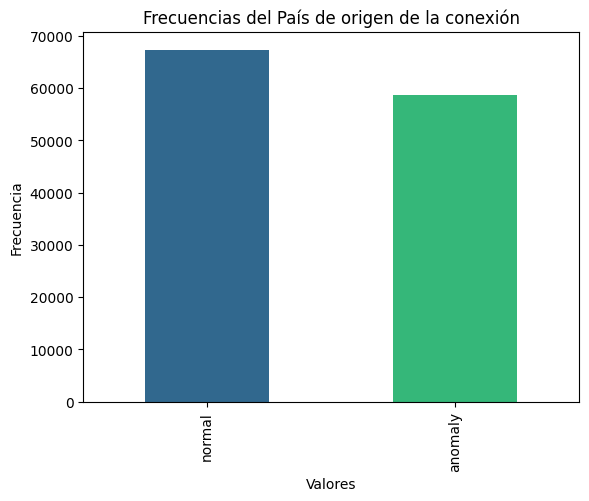

In [ ]:
import matplotlib.pyplot as plt


frec = df['Class'].value_counts()

colors = sns.color_palette('viridis', len(frec))

frec.plot(kind='bar', color=colors)
plt.title('Frecuencias del País de origen de la conexión')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

plt.show()

In [ ]:
data.head()

,same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate,srv_serror_rate,dst_host_diff_srv_rate,serror_rate,count,...,wrong_fragment,dst_host_rerror_rate,dst_host_count,service,dst_host_srv_rerror_rate,logged_in,diff_srv_rate,srv_diff_host_rate,srv_rerror_rate,Label
0,0.08,0.88,0.00,0.00,0.003922,0.00,0.0,0.60,0.0,0.025440,...,0.0,0.0,1.000000,0.105857,0.00,0.0,0.15,0.00,0.0,0
1,0.05,0.00,1.00,0.10,0.101961,1.00,1.0,0.05,1.0,0.240704,...,0.0,0.0,1.000000,1.000000,0.00,0.0,0.07,0.00,0.0,1
2,1.00,0.03,0.03,1.00,1.000000,0.01,0.2,0.00,0.2,0.009785,...,0.0,0.0,0.117647,0.139262,0.01,1.0,0.00,0.00,0.0,0
3,1.00,0.00,0.00,1.00,1.000000,0.00,0.0,0.00,0.0,0.058708,...,0.0,0.0,1.000000,0.139262,0.00,1.0,0.00,0.09,0.0,0
4,0.16,0.00,0.00,0.07,0.074510,0.00,0.0,0.07,0.0,0.236791,...,0.0,1.0,1.000000,1.000000,1.00,0.0,0.06,0.00,1.0,1


In [ ]:
matriz_correlacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1.0 to 0.013
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   diff_srv_rate                37 non-null     float64
 1   dst_bytes                    37 non-null     float64
 2   dst_host_count               37 non-null     float64
 3   dst_host_diff_srv_rate       37 non-null     float64
 4   dst_host_rerror_rate         37 non-null     float64
 5   dst_host_same_src_port_rate  37 non-null     float64
 6   dst_host_same_srv_rate       37 non-null     float64
 7   dst_host_serror_rate         37 non-null     float64
 8   dst_host_srv_count           37 non-null     float64
 9   dst_host_srv_diff_host_rate  37 non-null     float64
 10  dst_host_srv_rerror_rate     37 non-null     float64
 11  dst_host_srv_serror_rate     37 non-null     float64
 12  duration                     37 non-null     float64
 13  hot                   

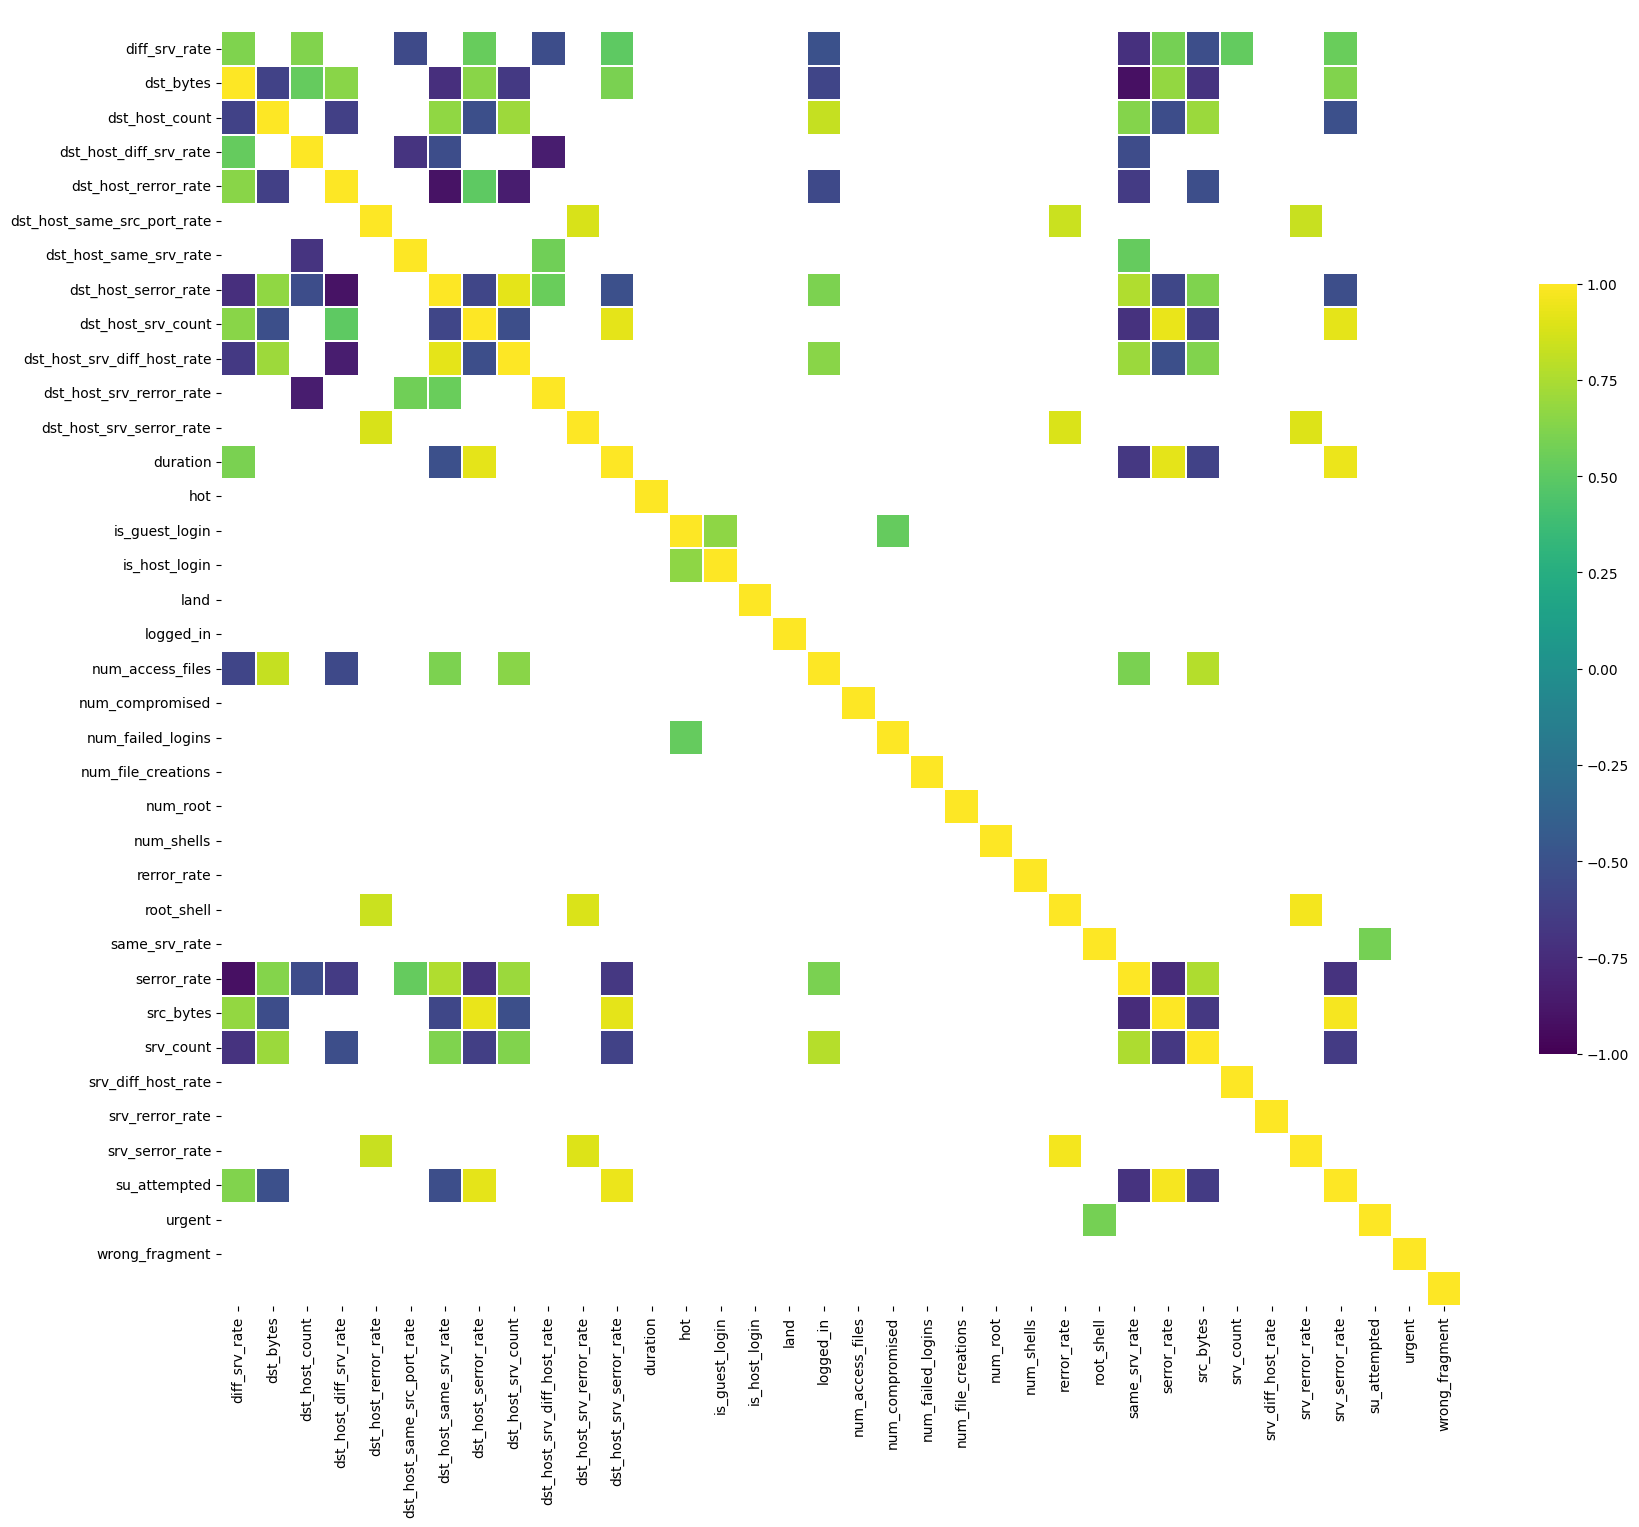

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

matriz_correlacion = pd.read_csv('/content/drive/MyDrive/nsl-kdd/results/corr_matrix.csv', index_col=0)

plt.figure(figsize=(20, 20))

# Generar el heatmap
sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.5) | (matriz_correlacion <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=False, square=True, cbar_kws={'shrink': .5},
            xticklabels=matriz_correlacion.columns, yticklabels=matriz_correlacion.columns)

# Aumentar el tamaño de la fuente de las etiquetas de los ejes
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel('')
plt.xlabel('')

# Título del gráfico
plt.title('  ')

# Mostrar el gráfico
plt.show()

# Clearing dataset

In [ ]:
import json

dataset_name = 'nsl-kdd'


var_report = {}
with open(f'./drive/MyDrive/{dataset_name}/results/var_report.json', 'r') as file:
  var_report = json.load(file)

pca_vars = {}
with open(f'./drive/MyDrive/{dataset_name}/results/pca_vars.json', 'r') as file:
  pca_vars = json.load(file)

kBest = {}
with open(f'./drive/MyDrive/{dataset_name}/results/kBest.json', 'r') as file:
  kBest = json.load(file)

elim_corr = {}
with open(f'./drive/MyDrive/{dataset_name}/results/eliminacion_correlacion.json', 'r') as file:
  elim_corr = json.load(file)

df_train = pd.read_csv(f'./drive/MyDrive/{dataset_name}/a_KDDTrain+.csv')
df_test = pd.read_csv(f'./drive/MyDrive/{dataset_name}/KDDTest+.csv')
df_test.columns = df_columns
df_test.rename(columns={'class':'Class'}, inplace=True)

In [ ]:
sesgadas = [key for d in var_report.get('sesgadas') for key in d.keys()]

ceros = [key for d in var_report.get('zero_vars') for key in d.keys()]

eliminar = set(sesgadas) & set(ceros)
print(eliminar)

{'num_shells', 'land', 'su_attempted', 'num_access_files', 'num_root', 'num_compromised', 'num_file_creations', 'duration', 'hot', 'root_shell', 'is_guest_login', 'num_failed_logins', 'urgent', 'wrong_fragment'}


In [ ]:
kB_vars = set(kBest.get('filtered'))
top_vars = kB_vars & set(pca_vars.get('selección'))
len(top_vars)

20

In [ ]:
correladas = elim_corr.get('candidatos_eliminar')
len(top_vars - set(correladas))

7

In [ ]:
df_train[top_vars].to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}_train.csv',index=False, header=True, na_rep='', encoding='utf-8')
df_test[top_vars].to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}_test.csv',index=False, header=True, na_rep='', encoding='utf-8')

<ipython-input-36-119df85d5840>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train[top_vars].to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}_train.csv',index=False, header=True, na_rep='', encoding='utf-8')
<ipython-input-36-119df85d5840>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test[top_vars].to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}_test.csv',index=False, header=True, na_rep='', encoding='utf-8')


In [ ]:
df_test[top_vars]

<ipython-input-35-75de0420e1c9>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test[top_vars]


,logged_in,dst_host_same_srv_rate,wrong_fragment,same_srv_rate,srv_diff_host_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_srv_count,count,rerror_rate,...,srv_serror_rate,dst_host_count,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,serror_rate,Class,dst_host_diff_srv_rate,service,diff_srv_rate,srv_rerror_rate
0,0,0.00,0,0.01,0.00,1.00,0.00,1,136,1.0,...,0.00,255,0.0,1.00,0.0,anomaly,0.06,private,0.06,1.0
1,0,0.61,0,1.00,0.00,0.00,0.61,86,1,0.0,...,0.00,134,0.0,0.00,0.0,normal,0.04,ftp_data,0.00,0.0
2,0,1.00,0,1.00,1.00,0.00,1.00,57,1,0.0,...,0.00,3,0.0,0.00,0.0,anomaly,0.00,eco_i,0.00,0.0
3,0,0.31,0,1.00,0.75,0.83,0.03,86,1,1.0,...,0.12,29,0.0,0.71,0.0,anomaly,0.17,telnet,0.00,0.5
4,1,1.00,0,1.00,0.00,0.00,0.01,255,4,0.0,...,0.00,155,0.0,0.00,0.0,normal,0.00,http,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1,0.72,0,1.00,0.00,0.00,0.01,141,1,0.0,...,0.00,100,0.0,0.00,0.0,normal,0.06,smtp,0.00,0.0
22539,1,1.00,0,1.00,0.18,0.00,0.01,255,2,0.0,...,0.00,197,0.0,0.00,0.0,normal,0.00,http,0.00,0.0
22540,1,1.00,0,1.00,0.20,0.07,0.00,255,5,0.0,...,0.00,255,0.0,0.07,0.0,anomaly,0.00,http,0.00,0.0
22541,0,0.99,0,1.00,0.33,0.00,0.00,252,4,0.0,...,0.00,255,0.0,0.00,0.0,normal,0.01,domain_u,0.00,0.0
